![](../docs/banner.png)

# Chapter 1: Introduction to Spatial Data

**Tomas Beuzen, 2021**

![](img/map.png)

## Chapter Outline
<hr>

<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-Learning-Objectives" data-toc-modified-id="Chapter-Learning-Objectives-2">Chapter Learning Objectives</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li><li><span><a href="#1.-Introduction-to-spatial-data" data-toc-modified-id="1.-Introduction-to-spatial-data-4">1. Introduction to spatial data</a></span></li><li><span><a href="#2.-Working-with-vector-data" data-toc-modified-id="2.-Working-with-vector-data-5">2. Working with vector data</a></span></li><li><span><a href="#3.-Working-with-raster-data" data-toc-modified-id="3.-Working-with-raster-data-6">3. Working with raster data</a></span></li><li><span><a href="#4.-Coordinate-reference-systems" data-toc-modified-id="4.-Coordinate-reference-systems-7">4. Coordinate reference systems</a></span></li></ul></div>

## Chapter Learning Objectives
<hr>

- Describe the difference between vector and raster data.
- Load vector data into `geopandas`.
- Plot vector data using the `geopandas` method `.plot()`.
- Wrangle vector data using `geopandas` functions, methods, and attributes like `gpd.sjoin()`, `gpd.clip()`, `.length()`, `.buffer()`, etc.
- Import data from OpenStreetMap using `osmnx`.
- Read raster data with `rasterio`.
- Describe at a high level why coordinate reference systems (CRS) are important and identify the CRS of a `geopandas` object using the `.crs` attribute and reproject it to another CRS using the `.to_crs()` method.

## Imports
<hr>

In [9]:
import rasterio
import numpy as np
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6, 6), 'axes.edgecolor': '0.2'})

## 1. Introduction to spatial data
<hr>

Spatial data (or "geospatial" data) are data with location information. When analyzing this data, we are interested in wrangling, plottling, modelling to better understand this spatial dependence. 

To get you excited about geospatial data, here's a cool 3D map of UBC that we'll build together next lecture:

In [1]:
%%html
<iframe src="../_images/ubc-3d.html" width="80%" height="500"></iframe>

The first thing we need to know is that there are two main data formats used to represent spatial data:
1. Vector format
2. Raster format

## 2. Working with vector data
<hr>

### 2.1. Vector data

Vector data is an intuitive and common spatial data format and the one we'll focus on most in this chapter. Vector data is simply a collection of discrete locations (`(x, y)` values) called "vertices" that define one of three shapes:
1. **Point**: a single `(x, y)` point. Like the location of your house.
2. **Line**: two or more connected `(x, y)` points. Like a road.
3. **Polygon**: three or more `(x, y)` points connected and closed. Like a lake, or the border of a country.

![](img/vector.png)

>Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

Vector data is most commonly stored in a "shapefile". A shapefile is actually composed of 3 required files with the same prefix (here, `spatial-data`) but different extensions:
1. `spatial-data.shp`: main file that stores records of each shape geometries
2. `spatial-data.shx`: index of how the geometries in the main file relate to one-another
3. `spatial-data.dbf`: attributes of each record

There are [other optional files](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/shapefile-file-extensions.htm) that may also be part of a shapefile but we won't worry about them for now. Each shapefile can only contain one type of shape. For example, the descriptions for a house (point), a road (line), and a postal code area (polygon) would be stored in three separate shapefiles.

>There are other file-types for storing vector data too like `geojson`. These files can generally be imported into Python using the same methods and packages we use below.

### 2.2. Geopandas

The Python [geopandas](https://geopandas.org/getting_started/introduction.html) library is the main library we'll be using to work with vector data in Python. It's built off `shapely` (which is *the* Python library for working with geometric objects in Python) and `pandas`. Similar to `pandas`, `geopandas` provides two key classes for spatial data manipulation:
1. `GeoSeries`: just like a `pandas` series but stores geometries like points, lines, polygons (we'll see that shortly)
2. `GeoDataFrame`: just like a `pandas` dataframe with one or more columns of regular series and one or more columns of `geoseries`.

Along with those classes, we also have a variety of cool geopstial wrangling methods which we'll explore in this chapter. For now, here's a schematic of a `GeoDataFrame`:

![](img/geopandas.png)

>Source: [GeoPandas Documentation](https://geopandas.org/getting_started/introduction.html).

We usually import `geopandas` using the alias `gpd`:

In [3]:
import geopandas as gpd

### 2.3. Loading data

Let's take a look at loading in a shapefile to a `GeoDataFrame` now. I downloaded a shapefile of Candian provinces from [statcan](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm) as a shapefile that looks like this:

```
provinces
├── provinces.dbf
├── provinces.shp
├── provinces.shx
└── provinces.prj  # this contains projection information which I'll dicuss later
```

We can read that shapefile using `gpd.read_file()`:

In [4]:
provinces = gpd.read_file("data-spatial/provinces")  # note that I point to the shapefile "directory" containg all the individual files
provinces = provinces.to_crs("EPSG:4326")    # I'll explain this later, I'm converting to a different coordinate reference system
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40256 54.14965, -57.38429 ..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98300 46.45775, -61.98136 ..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((-61.90233 45.87878, -61.90057 ..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-58.64703 51.20816, -58.63991 ..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-88.86612 56.84777, -88.86838 ..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-94.82341 59.99352, -94.82398 ..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-109.63748 60.00005, -109.62498 60.0..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((-110.00001 59.95257, -110.00001 59.9..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


In [5]:
type(provinces)

geopandas.geodataframe.GeoDataFrame

Because `geopandas` is built off `pandas`, our `GeoDataFrame` inherits most of the same functionality as a regular dataframe. For example, let's try the `.info()` method:

In [6]:
provinces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PRUID     13 non-null     object  
 1   PRNAME    13 non-null     object  
 2   PRENAME   13 non-null     object  
 3   PRFNAME   13 non-null     object  
 4   PREABBR   13 non-null     object  
 5   PRFABBR   13 non-null     object  
 6   geometry  13 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 856.0+ bytes


Note we have 5 columns of dtype "object" which typically means "strings" in `pandas`, and we have our one "geometry" column which contains vector data - polygons in this case. Well we have `MULTIPOLYGON`s which just means multiple polygons together, for example British Columbia has a lot of little islands, so to make a boundary of it, we need multiple polygons.

`geopandas` has built-in plotting functionality (just like `pandas`) which is useful for making quick plots to visualize your data:

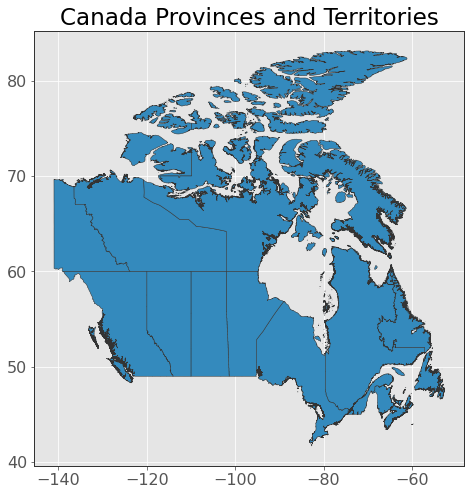

In [8]:
provinces.plot(edgecolor="0.2", figsize=(10, 8))
plt.title("Canada Provinces and Territories");

That looks like Canada to me! We can also index our `GeoDataFrame` just like a regular dataframe:

In [9]:
provinces.iloc[[0]]

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40256 54.14965, -57.38429 ..."


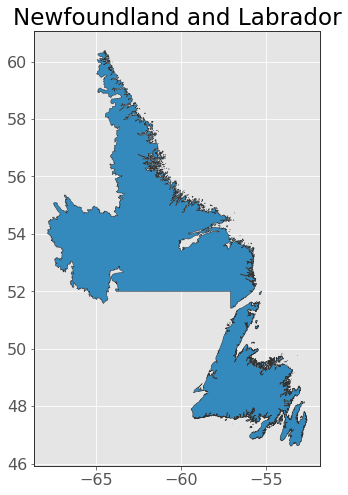

In [10]:
name = provinces.iloc[0]["PRENAME"]
provinces.iloc[[0]].plot(edgecolor="0.2", figsize=(10, 8))
plt.title(name);

Let's filter our dataframe for only British Columbia using the helpful `pandas` method `.query()`:

In [11]:
province = "British Columbia"
bc = provinces.query("PRENAME == @province").copy()
bc

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


Now, let's do some simple manipulation to clean up our dataframe:

In [12]:
bc = (bc.loc[:, ["PRENAME", "geometry"]]
        .rename(columns={"PRNAME": "Province"})
        .reset_index(drop=True)
      )
bc

,PRENAME,geometry
0,British Columbia,"MULTIPOLYGON (((-135.40000 60.00006, -135.3875..."


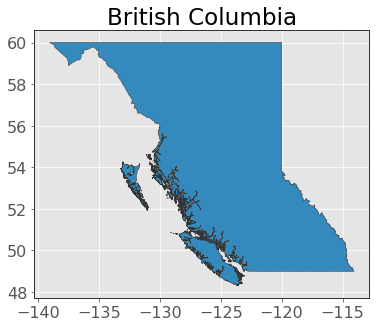

In [13]:
bc.plot(edgecolor="0.2")
plt.title("British Columbia");

### 2.3. Making data

Typically, you'll be loading data from a file like we did above (or using an API as we'll do later in this chapter). But we can also create our own vector data. Let's create some "points" for BC's biggest cities in a regular dataframe:

In [14]:
cities = pd.DataFrame(
    {"City": ["Vancouver", "Victoria", "Kelowna"],
     "Population": [2_264_823, 335_696, 151_957],
     "Latitude": [49.260833, 48.428333, 49.888056],
     "Longitude": [-123.113889, -123.364722, -119.495556],
    }
)
cities

,City,Population,Latitude,Longitude
0,Vancouver,2264823,49.260833,-123.113889
1,Victoria,335696,48.428333,-123.364722
2,Kelowna,151957,49.888056,-119.495556


We can coerce that data into a `GeoDataFrame` using `gpd.GeoDataFrame()` and by using the function `gpd.points_from_xy()` to change our "Latitude" and "Longitude" columns to geometries:

In [15]:
cities = gpd.GeoDataFrame(cities,
                          crs="EPSG:4326",  # I'll talk about this later
                          geometry=gpd.points_from_xy(cities["Longitude"], cities["Latitude"]))
cities

,City,Population,Latitude,Longitude,geometry
0,Vancouver,2264823,49.260833,-123.113889,POINT (-123.11389 49.26083)
1,Victoria,335696,48.428333,-123.364722,POINT (-123.36472 48.42833)
2,Kelowna,151957,49.888056,-119.495556,POINT (-119.49556 49.88806)


Let's plot those points on our map:

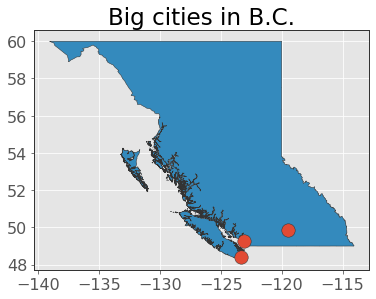

In [16]:
ax = bc.plot(edgecolor="0.2")
cities.plot(ax=ax, markersize=180, edgecolor="0.2")
plt.title("Big cities in B.C.");

### 2.4. Loading from Open Street Map

So we can read vector data from a file and we can create our own, but let's see what real power feels like!

![](img/real-power.gif)

Often it will be helpful to obtain data from an online source using an API. The most relevant "online source" here is [OpenStreetMap (OSM)](https://www.openstreetmap.org/), which is like the Wikipedia of geospatial data (think world map, road networks, bike networks, buidling heights, sandy coastlines, you name it). There are plenty of Python APIs for getting data from OSM but by far the best I've come across is [osmnx](https://github.com/gboeing/osmnx/tree/master):

```console
conda install -c conda-forge osmnx
```

`osmnx` provides an easy-to-use API to query OSM data. I usually import it with the alias `ox`. Let's get a polygon of Vancouver now using the function `ox.geocode_to_gdf()`:

>By default `osmnx` caches responses locally in a folder `cache` so that you can quickly access data again without needing to call the API. You can turn this behaviour off if you wish.

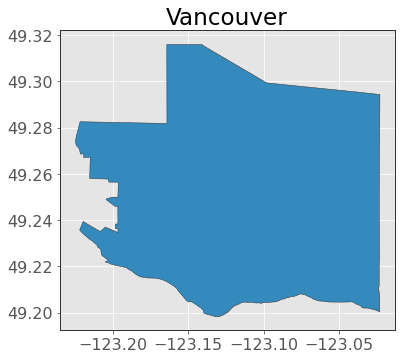

In [17]:
import osmnx as ox

vancouver = ox.geocode_to_gdf("Vancouver, Canada")
vancouver.plot(edgecolor="0.2")
plt.title("Vancouver");

It's certainly Vancouver, but it looks a bit blocky. It might be a bit low resolution, or someone just decided this was the best way to encapsulate "Vancouver" on OSM. Either way, let's use this polygon to "clip" a section of our higher-resolution provinces data which we downloaded earlier (and which is the official shapefile downloaded from [statcan](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm)).

This is the first geometric wrangling operation we'll see. I'll show some more later, but think of "clipping" as passing a top layer of cookie dough (the map above), over a bottom layer cookiecutter (our high-resolution provinces data) to get a shape out:

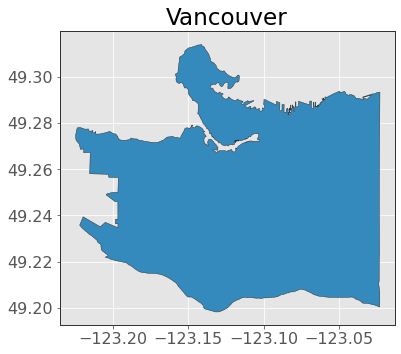

In [18]:
van_bc = gpd.clip(bc, vancouver)
van_bc.plot(edgecolor="0.2")
plt.title("Vancouver");

That looks better! Now we can clearly see Stanley Park at the top of the plot! Speaking of which, let's get a polygon of Stanley Park:

In [19]:
stanley_park = ox.geocode_to_gdf("Stanley Park, Vancouver")

And plot it on our map:

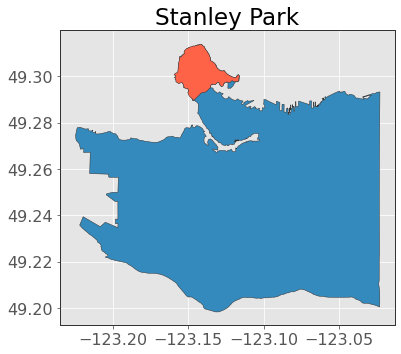

In [20]:
ax = van_bc.plot(edgecolor="0.2")
stanley_park.plot(ax=ax, edgecolor="0.2", color="tomato")
plt.title("Stanley Park");

Okay let's do one last cool thing! Let's use `osmnx` to get the bicycle network within Stanley Park! We can get networks like road, rail, bike, etc., using the function `ox.graph_from_place()`:

In [21]:
bike_network = ox.graph_from_place("Stanley Park, Vancouver",
                                   network_type="bike")
bike_network

As you can see, this returns a different object, a [networkx](https://networkx.org/) `MultiDiGraph` which is a structure for holding network/graph-like objects such as road networks. We're not interested in graph operations, we are just interested in geometries, so we'll convert this to a `GeoDataFrame` using the function `ox.graph_to_gdfs()`:

In [22]:
bike_network = (ox.graph_to_gdfs(bike_network, nodes=False)
                  .reset_index(drop=True)
                  .loc[:, ["name", "length", "bridge", "geometry"]]
               )
bike_network

,name,length,bridge,geometry
0,Stanley Park Causeway,165.216,yes,"LINESTRING (-123.13719 49.29767, -123.13718 49..."
1,Stanley Park Causeway,62.901,NaN,"LINESTRING (-123.13719 49.29767, -123.13741 49..."
2,NaN,8.066,NaN,"LINESTRING (-123.13211 49.29737, -123.13212 49..."
3,Stanley Park Drive,80.558,NaN,"LINESTRING (-123.13211 49.29737, -123.13204 49..."
4,NaN,91.001,NaN,"LINESTRING (-123.13211 49.29737, -123.13212 49..."
...,...,...,...,...
361,NaN,12.670,NaN,"LINESTRING (-123.12854 49.29693, -123.12863 49..."
362,NaN,44.325,NaN,"LINESTRING (-123.12854 49.29693, -123.12869 49..."
363,Stanley Park Drive,3.339,NaN,"LINESTRING (-123.14577 49.29042, -123.14572 49..."
364,Park Lane,29.437,NaN,"LINESTRING (-123.14668 49.29078, -123.14658 49..."


Now let's plot this bike network on Stanley Park!

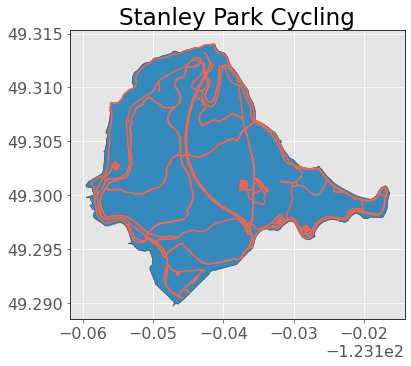

In [23]:
ax = stanley_park.plot(edgecolor="0.2")
bike_network.plot(ax=ax, edgecolor="0.2", color="tomato")
plt.title("Stanley Park Cycling");

Amazing stuff!

### 2.5. Basic wrangling

So we did some cool mapping and data manipulation above, but what's it all for? Why would you want to do any of this? Well we can now start calculating and manipulating this spatial data to answer questions. Let's answer some now.

#### Question 1: What is the total length of bike lanes in Stanley Park?

Well, our `GeoDataFrame` actually already has this information, it came for free from our original `ox.graph_from_place()` function and is in the "length" column:

In [24]:
total_length = bike_network["length"].sum()  # total length in m
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 58km


But even if we didn't have this column, we could still calculate lengths based on our line geometries and the `.length` attribute:

In [25]:
bike_network["geometry"]

0      LINESTRING (-123.13719 49.29767, -123.13718 49...
1      LINESTRING (-123.13719 49.29767, -123.13741 49...
2      LINESTRING (-123.13211 49.29737, -123.13212 49...
3      LINESTRING (-123.13211 49.29737, -123.13204 49...
4      LINESTRING (-123.13211 49.29737, -123.13212 49...
                             ...                        
361    LINESTRING (-123.12854 49.29693, -123.12863 49...
362    LINESTRING (-123.12854 49.29693, -123.12869 49...
363    LINESTRING (-123.14577 49.29042, -123.14572 49...
364    LINESTRING (-123.14668 49.29078, -123.14658 49...
365    LINESTRING (-123.14668 49.29078, -123.14670 49...
Name: geometry, Length: 366, dtype: geometry

In [26]:
bike_network["geometry"].length

/opt/miniconda3/envs/mds574/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      0.001653
1      0.000751
2      0.000073
3      0.001029
4      0.001151
         ...   
361    0.000133
362    0.000477
363    0.000044
364    0.000393
365    0.000628
Length: 366, dtype: float64

What's that warning? More on that a bit later, but it's telling us that our coordinate system has units of degrees - not linear units like meters which would be better for calculating distances. I'm going to convert my geometries to a coordinate systems based on linear units (meters). I'll specify the projection "EPSG:3347" (Lambert projection) which is the one used by [statcan](https://www150.statcan.gc.ca/n1/pub/92-195-x/2011001/other-autre/mapproj-projcarte/m-c-eng.htm):

In [27]:
bike_network = bike_network.to_crs("EPSG:3347")
bike_network["geometry"].length

0      165.142206
1       62.941716
2        8.058879
3       80.655282
4       91.110800
          ...    
361     12.667118
362     44.326065
363      3.343832
364     29.484229
365     48.942512
Length: 366, dtype: float64

In [28]:
total_length = bike_network["geometry"].length.sum()
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 58km


The same as we got before! Nice!

#### Question 2: What percentage of the area of Stanley Park is bike lanes?

This is a tougher one! First let's calculate the "area" of our bike lanes. We need to make an assumption about the width of our lanes. This [City of Vancouver planning document](https://vancouver.ca/files/cov/protected-bike-lane-catalogue-part-2-two-way-lanes-and-pathways.pdf) suggests the bike lanes around Stanley Park are about 3m so let's go with that.

I'm going to use the `.buffer()` method to turn the lines of my bike network into polygons with a specified width (3m in our cases). Because my `bike_network` data is in linear meters units now (remember, I changed the projection), I'm also going to convert our Stanley Park map to that projection ("EPSG:3347"):

In [29]:
stanley_park = stanley_park.to_crs("EPSG:3347")

Now let's "buffer" our bike lanes to be me 3m wide polygons. "Buffer" just mean to add some area around the object:

![](img/buffer.png)

In [30]:
width = 3  # desired with of bike lanes in meters
bike_network["geometry"] = bike_network.buffer(distance=width / 2)  # note that we provide distance as a radius (half the desired width)
bike_network

,name,length,bridge,geometry
0,Stanley Park Causeway,165.216,yes,"POLYGON ((4018562.106 2009363.283, 4018563.601..."
1,Stanley Park Causeway,62.901,NaN,"POLYGON ((4018554.879 2009389.952, 4018550.455..."
2,NaN,8.066,NaN,"POLYGON ((4018874.157 2009173.346, 4018874.220..."
3,Stanley Park Drive,80.558,NaN,"POLYGON ((4018877.663 2009164.604, 4018883.832..."
4,NaN,91.001,NaN,"POLYGON ((4018870.301 2009159.558, 4018867.565..."
...,...,...,...,...
361,NaN,12.670,NaN,"POLYGON ((4019075.828 2009012.416, 4019075.828..."
362,NaN,44.325,NaN,"POLYGON ((4019065.791 2008999.105, 4019063.426..."
363,Stanley Park Drive,3.339,NaN,"POLYGON ((4017636.250 2008950.892, 4017636.334..."
364,Park Lane,29.437,NaN,"POLYGON ((4017601.662 2009019.800, 4017601.738..."


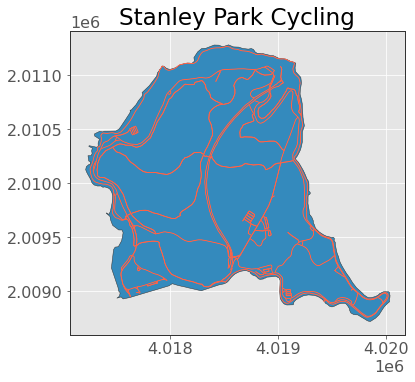

In [31]:
ax = stanley_park.plot(edgecolor="0.2")
bike_network.plot(ax=ax, edgecolor="tomato")
plt.title("Stanley Park Cycling");

Now we can calculate the area using the `.area` attribute. Note that `geopandas` is smart enough to know that you probably want to calculate these spatial attributes on the `geometry` column, so you don't actually have to index that particular column (if you have multiple geometry columns, then you can choose which one is "active" and acted on by default using the `.set_geometry()` method):

In [32]:
bike_network_area = bike_network.area.sum()
print(f"Bike path area: {bike_network_area:.0f} m2")

Bike path area: 177968 m2


If you think about it, that should be roughly similar to if we just multiplied our `total_length` from "Question 1" by 3 (the width of the bike paths):

In [33]:
total_length * 3

175429.60863417128

Well that's a nice sanity check! Now we just need the area of Stanley Park and we can calculate our ratio:

In [34]:
stanley_park_area = stanley_park.area
print(f"{bike_network_area / stanley_park_area[0] * 100:.2f}% of Stanley Park is bike paths.")

4.45% of Stanley Park is bike paths.


#### Question 3: What FSA in Vancouver has the most bike lanes (by length)?

An FSA is a "forward sortation area", basically a group of postcodes that all start with the same first 3 letters. So to answer this question, we need two things:
1. FSA polygons (available on [statcan here](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm))
2. The bike network for all of Vancouver

I have already downloaded the above shapefile of FSAs for all of Canada. We'll load it in and then clip it using our Vancouver polygon:

In [35]:
fsa = gpd.read_file("data-spatial/fsa")
fsa = fsa.to_crs("EPSG:4326")
van_fsa = gpd.clip(fsa, vancouver)

Now let's get the Vancouver bike network using `osmnx`:

In [36]:
van_bike_network = ox.graph_from_place("Vancouver", network_type="bike")
van_bike_network = (ox.graph_to_gdfs(van_bike_network, nodes=False)
                      .reset_index(drop=True)
                      .loc[:, ["name", "length", "bridge", "geometry"]]
                   )

Let's take a look at our data so far:

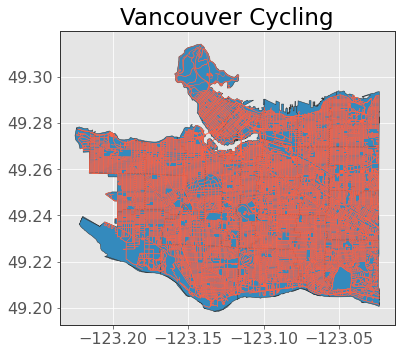

In [37]:
ax = van_fsa.plot(edgecolor="0.2")
van_bike_network.plot(ax=ax, edgecolor="tomato", linewidth=0.5)
plt.title("Vancouver Cycling");

Okay so how do we work out the total length of bike lanes in each FSA? We need to do a spatial join, which joins two geometries based on their locations. In the plot below, we'll join the column of the dark dot to the column(s) of the grey polygon because the dark dot is contained within the spatial region of the polygon.

![](img/spatial-join.png)

>Source: [GISGeography](https://gisgeography.com/spatial-join/).

We can do a spatial join with `gpd.sjoin()` (it's just like joining in base `pandas`). There are different options for the argument `op` which allow you how to control the join. Below I'll specify "contain", meaning I only want to join when a bike lane is fully contained within an FSA (you can read more about `op` in the [documentation](https://geopandas.org/docs/user_guide/mergingdata.html#sjoin-arguments));

In [38]:
joined_data = gpd.sjoin(van_fsa, van_bike_network, how="inner", op="contains")
joined_data

,CFSAUID,PRUID,PRNAME,geometry,index_right,name,length,bridge
1386,V5Z,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.11483 49.26939, -123.11482 49.2...",14683,West 49th Avenue,113.479,NaN
1386,V5Z,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.11483 49.26939, -123.11482 49.2...",11256,West 49th Avenue,113.479,NaN
1386,V5Z,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.11483 49.26939, -123.11482 49.2...",11211,West 49th Avenue,115.184,NaN
1386,V5Z,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.11483 49.26939, -123.11482 49.2...",11257,West 49th Avenue,115.184,NaN
1386,V5Z,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.11483 49.26939, -123.11482 49.2...",11214,Fremlin Street,51.729,NaN
...,...,...,...,...,...,...,...,...
1615,V6R,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.21376 49.27669, -123.21346 49.2...",48960,NaN,221.171,NaN
1615,V6R,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.21376 49.27669, -123.21346 49.2...",48957,NaN,105.284,NaN
1615,V6R,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.21376 49.27669, -123.21346 49.2...",54169,NaN,105.284,NaN
1615,V6R,59,British Columbia / Colombie-Britannique,"POLYGON ((-123.21376 49.27669, -123.21346 49.2...",40455,NaN,292.839,NaN


Now we just need to `.groupby()`:

In [39]:
(joined_data[["CFSAUID", "length"]].groupby(by="CFSAUID")
                                   .sum()
                                   .sort_values("length", ascending=False)
                                   .head()
)

,length
CFSAUID,
V6P,348095.253
V5R,281367.666
V5X,264815.800
V5S,259047.140
V5K,245773.116


We see that "V6P" has the largest length of bike lanes, what FSA is that?

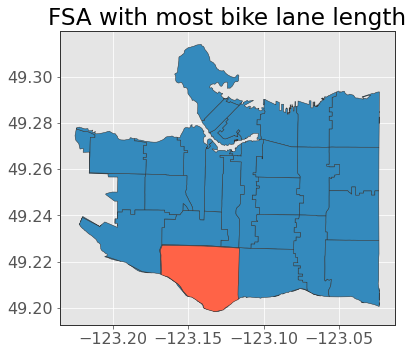

In [40]:
ax = van_fsa.plot(edgecolor="0.2")
van_fsa.query("CFSAUID == 'V6P'").plot(ax=ax, edgecolor="0.2", color="tomato")
plt.title("FSA with most bike lane length");

Looks good to me!

## 3. Working with raster data

Unlike vector data (geometric objects: like points, lines, polygons), raster data is a matrix of values of "pixels" (also called "cells"). Each cell represents a small area and contains a value representing some information:

![](img/raster.png)

>Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

Raster data is like digital image data you look at on your computer, except that now, each pixel represents a spatial region. The "resolution" of a raster is the area that each pixel represents. A 1 meter resolution raster means that each pixel represents a 1 m x 1 m area on the ground. However, when we say "high resolution" we often mean, a low value of resolution for each pixel, i.e., 1 meter resolution is higher than 8 meter resolution as exmplified by the image below:

![](img/raster-resolution.png)

>Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

Like vector data, there are different file formats for storing raster data. The most common is GeoTIFF (`.tif`), which is essentially an image file with georeferencing information embedded within it. Raster data is used for a variety of problems, common examples include satellite imagery and digital elevation models. Those things are gettings a bit outside the scope of this course but let's briefly look at some raster data below. The core packge for working with raster data in Python is [rasterio](https://rasterio.readthedocs.io/en/latest/index.html).

In [41]:
import rasterio

I have a satellite image raster file of part of UBC in my data folder which I downloaded from the [Abacus Data Network](https://abacus.library.ubc.ca/dataset.xhtml?persistentId=hdl:11272.1/AB2/6PFOWL). Let's load it in with `rasterio`:

In [42]:
dataset = rasterio.open("tif/ubc-481E_5456N/481E_5456N.tif")

We can start to investigate things like the width and height (in pixels/cells) of the raster:

In [43]:
print(f"Width: {dataset.width} pixels")
print(f"Height: {dataset.height} pixels")

Width: 10000 pixels
Height: 10000 pixels


Raster data often have "bands" representing different information (for example, a colour image usually has red, green, and blue bands). This particular satellite image has 4 bands (in order: red, blue, green, infrared):

In [44]:
dataset.count

4

We could import the first band as a numpy array using:

In [45]:
band1 = dataset.read(1)
band1

array([[ 70,  67,  52, ...,  88,  86,  85],
       [ 64,  60,  53, ...,  89,  88,  92],
       [ 67,  63,  62, ...,  93, 104, 107],
       ...,
       [ 58,  56,  54, ...,  52,  28,  20],
       [ 55,  56,  55, ...,  55,  30,  25],
       [ 54,  57,  59, ...,  30,  19,  29]], dtype=uint8)

But before importing anymore data, it's helpful to just see the image. First I'm going to "downsample" my raster (reduce the resolution by increasing the cell size) to reduce the size of the data and speed things up a bit:

In [46]:
rescale_factor = 0.5
scaled_data = dataset.read(out_shape=(dataset.count, int(dataset.height * rescale_factor),
                                      int(dataset.width * rescale_factor))
                          )
print(f"Scaled shape: {scaled_data.shape}")

Scaled shape: (4, 5000, 5000)


As our data is just numpy array(s), we can plot it with the `matplotlib` function `plt.imshow()`:

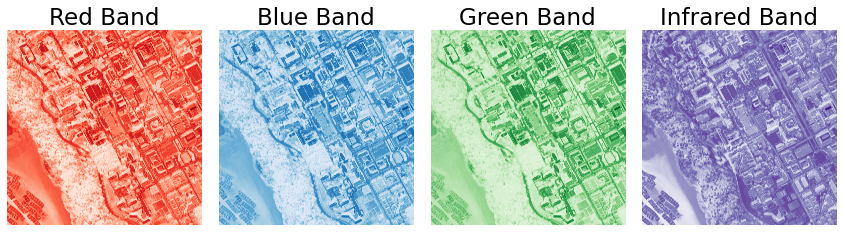

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
cmaps = ["Reds", "Blues", "Greens", "Purples"]
bands = ["Red Band", "Blue Band", "Green Band", "Infrared Band"]
for band in [0, 1, 2, 3]:
    ax[band].imshow(scaled_data[band, :, :], cmap=cmaps[band])
    ax[band].set_title(bands[band])
    ax[band].axis("off")
plt.tight_layout();

Of course, it looks more realistic using all channels:

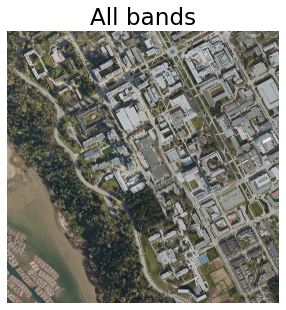

In [48]:
plt.figure(figsize=(5, 5))
plt.imshow(np.moveaxis(scaled_data, 0, -1)[:, :, :3])
plt.axis("off")
plt.title("All bands");

`rasterio` has lots of advanced fucntionality for manipulating and plotting raster data if you find the need to. [Check out the documentation](https://rasterio.readthedocs.io/en/latest/index.html).

## 4. Coordinate reference systems
<hr>

Generally speaking a coordinate reference system is how we project the 3D surface of the Earth onto a 2D shape for easy viewing

![](img/projection.gif)

There are [many different projections](https://en.wikipedia.org/wiki/List_of_map_projections) and they are typically identified by an [EPSG code](https://epsg.io/). No projection is perfect (it's impossible to perfectly flatten a 3d sphere) and each comprises on minimzing the distortion of shapes, distances, and areas of the Earth. At a basic level, all you need to know is that some projections are:
- in angular units (degrees of latitude and longitude) and are good for locating places on Earth, for making global maps, and minimizing shape distortion. The most common is WGS 84 ("[EPSG:4326](https://epsg.io/4326)")
- in linear units (e.g., meters) and are good for measuring distances. Most common is UTM which splits the Earth into different linear regions, the code for the region encompassing British Columbia is "[EPSG:32610](https://epsg.io/32610)"

But many countries/regions use other specific projections which minimize distortion of that specific area. For example Statistics Canada uses the Lambert projection for Canada ("[EPSG:3347](https://epsg.io/3347)"). Much of the time, you will know or be told which projection to use based on your specific data/project.

Let's take a quick look at some different projections for Canada now:

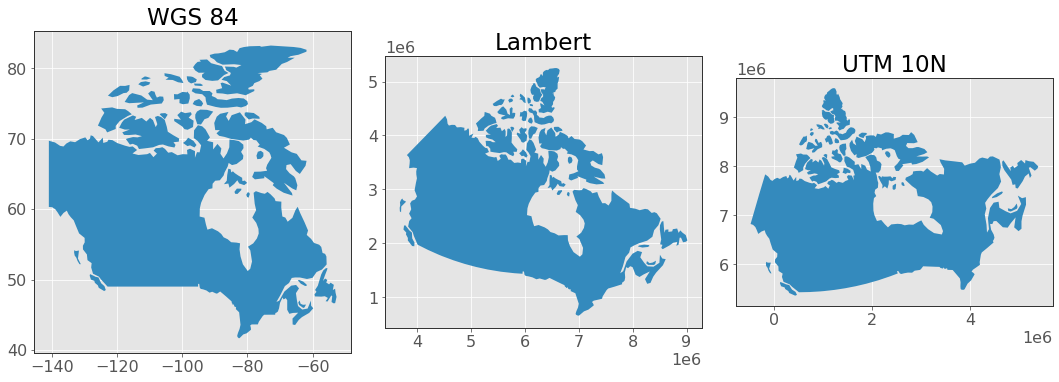

In [49]:
# Load data from geopandas
canada = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Canada'")

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
crs_list = [("WGS 84", "EPSG:4326"), ("Lambert", "EPSG:3347"), ("UTM 10N", "EPSG:32610")]
for n, (name, epsg) in enumerate(crs_list):
    canada.to_crs(epsg).plot(ax=axs[n])
    axs[n].set_title(name)
plt.tight_layout();

![](img/bye.png)